# Laboratorio 2
* Silvio Alejandro Urizar
* Reconocimiento de imágenes

In [31]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


## Problema 1
Desarrolle una función que permita la binarización de una imagen. Utilice el enfoque que desee

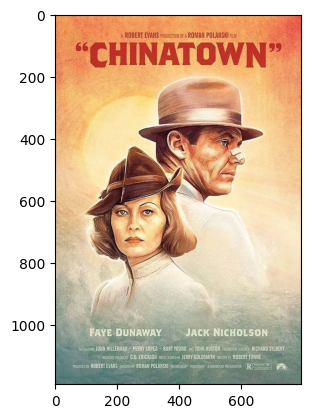

In [2]:
## Se inicia cargando la imagen
Im1Path = '/content/China.bmp'
Im1 = cv2.imread(Im1Path)
Im1 = cv2.cvtColor(Im1, cv2.COLOR_BGR2RGB)
plt.imshow(Im1)

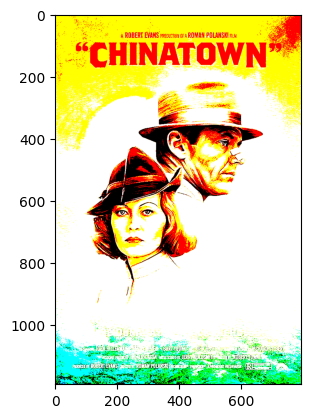

In [3]:
### Se hace la binarización con cv2 a color


thr1, Im1Bcv2 = cv2.threshold(Im1,120,255,cv2.THRESH_BINARY)
plt.imshow(Im1Bcv2)



In [4]:
## Se inicia para escala de grises
## Cambiar a blanco y negro
def Gscale(Im1):
  h,w = Im1.shape[0],Im1.shape[1]
  ImGS = np.zeros((h,w))
  for x in range(h):
    for y in range(w):
      R = Im1[x,y,0]
      G = Im1[x,y,1]
      B = Im1[x,y,2]
      ImGS[x,y] = 0.2126*R + 0.7152*G + 0.0722*B
  return ImGS


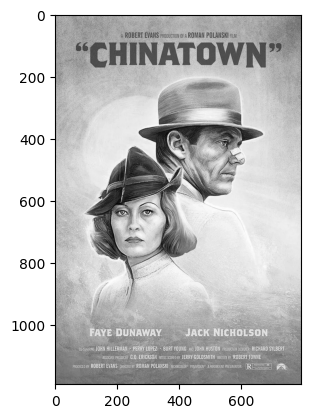

In [5]:
test = Gscale(Im1)
plt.imshow(test, cmap = 'gray')

In [6]:
def Binarize(Im1,ths):
  h,w = Im1.shape[0],Im1.shape[1]
  ImBin = np.zeros((h,w))
  for x in range(h):
    for y in range(w):
      if Im1[x,y] > ths:
        ImBin[x,y] = 255
      else:
        ImBin[x,y] = 0
  return ImBin


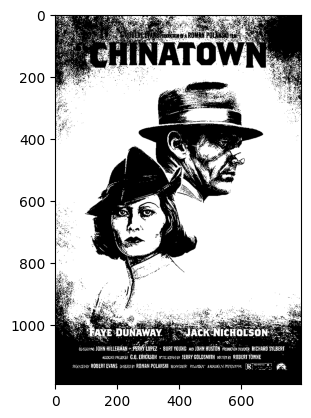

In [7]:
testf = Binarize(test,170)
plt.imshow(testf, cmap = 'gray')

## Problema 2

Desarrolle una función que, dadas dos imágenes a color, realice las operaciones de suma, resta, and, or y xor y de una imagen resultado.

In [8]:
### Se cargan las imágenes
ImCity = cv2.imread('/content/city.jpg')
ImCity = cv2.cvtColor(ImCity, cv2.COLOR_BGR2RGB)
ImUnited = cv2.imread('/content/rsz_united.jpg')
ImUnited = cv2.cvtColor(ImUnited, cv2.COLOR_BGR2RGB)

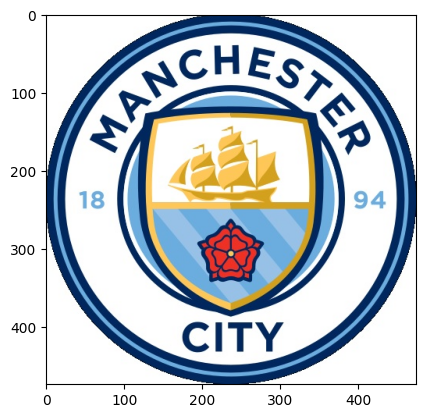

In [9]:
plt.imshow(ImCity)

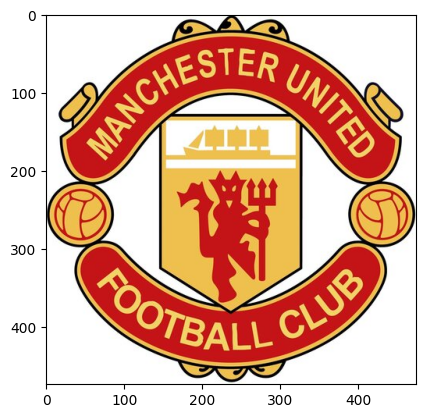

In [10]:
plt.imshow(ImUnited)

In [11]:
## Función Suma
def suma(Im1,Im2):
  h1,w1 = Im1.shape[0],Im1.shape[0]
  h2,w2 = Im2.shape[0],Im2.shape[0]
  ImSuma = np.zeros((h1,w1,3))
  Im1 = Im1/255
  Im2 = Im2/255

  if (h1 == h2) and (w1 == w2):
    for x in range(h1):
      for y in range(w1):
        ImSuma[x,y] = Im1[x,y] + Im2[x,y]
        if ImSuma[x,y,0] > 1:
          ImSuma[x,y,0] = 1
        if ImSuma[x,y,1] > 1:
          ImSuma[x,y,1] = 1
        if ImSuma[x,y,2] > 1:
          ImSuma[x,y,2] = 1
  ImSuma = ImSuma.astype('float32')
  return ImSuma




In [12]:
## Función resta
def resta(Im1,Im2):
  h1,w1 = Im1.shape[0],Im1.shape[0]
  h2,w2 = Im2.shape[0],Im2.shape[0]
  ImResta = np.zeros((h1,w1,3))
  Im1 = Im1/255
  Im2 = Im2/255

  if (h1 == h2) and (w1 == w2):
    for x in range(h1):
      for y in range(w1):
        ImResta[x,y] = Im1[x,y] - Im2[x,y]
        if ImResta[x,y,0] < 0:
          ImResta[x,y,0] = 0
        if ImResta[x,y,1] < 0:
          ImResta[x,y,1] = 0
        if ImResta[x,y,2] < 0:
          ImResta[x,y,2] = 0
  ImResta = ImResta.astype('float32')
  return ImResta

In [13]:
### Función AND
def ImAND(Im1,Im2):
    h1,w1 = Im1.shape[0],Im1.shape[0]
    h2,w2 = Im2.shape[0],Im2.shape[0]
    ImAND = np.zeros((h1,w1))
    Im1 = Im1/255
    Im2 = Im2/255

    if (h1 == h2) and (w1 == w2):
      for x in range(h1):
        for y in range(w1):
          ImAND[x,y] = Im1[x,y] and Im2[x,y]

    return ImAND


In [14]:
### Función OR
def ImOR(Im1,Im2):
    h1,w1 = Im1.shape[0],Im1.shape[0]
    h2,w2 = Im2.shape[0],Im2.shape[0]
    ImOR = np.zeros((h1,w1))
    Im1 = Im1/255
    Im2 = Im2/255

    if (h1 == h2) and (w1 == w2):
      for x in range(h1):
        for y in range(w1):
          ImOR[x,y] = Im1[x,y] or Im2[x,y]

    return ImOR

In [15]:
### Función XOR
def ImXOR(Im1,Im2):
    h1,w1 = Im1.shape[0],Im1.shape[0]
    h2,w2 = Im2.shape[0],Im2.shape[0]
    ImXOR = np.zeros((h1,w1))
    Im1 = Im1/255
    Im2 = Im2/255
    Im1 = Im1.astype('bool')
    Im2 = Im2.astype('bool')
    if (h1 == h2) and (w1 == w2):
      for x in range(h1):
        for y in range(w1):
          ImXOR[x,y] = Im1[x,y] ^ Im2[x,y]

    return ImXOR

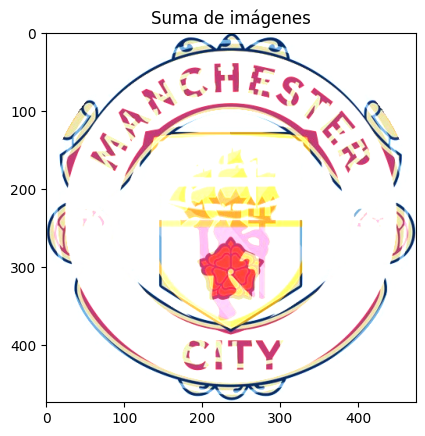

In [18]:
testsuma = suma(ImCity,ImUnited)
plt.title("Suma de imágenes")
plt.imshow(testsuma)

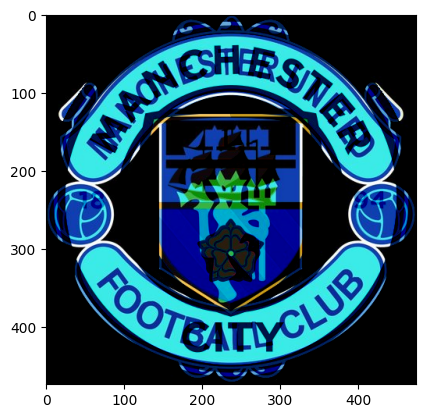

In [16]:
test2 = resta(ImCity,ImUnited)
plt.title("resta de imágenes")
plt.imshow(test2)

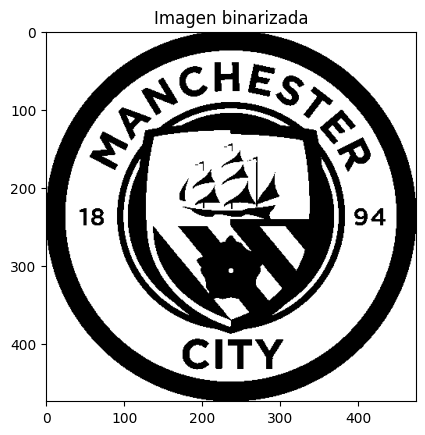

In [19]:
citybw = Gscale(ImCity)
citybin = Binarize(citybw,180)
plt.title("Imagen binarizada")
plt.imshow(citybin, cmap = 'gray')

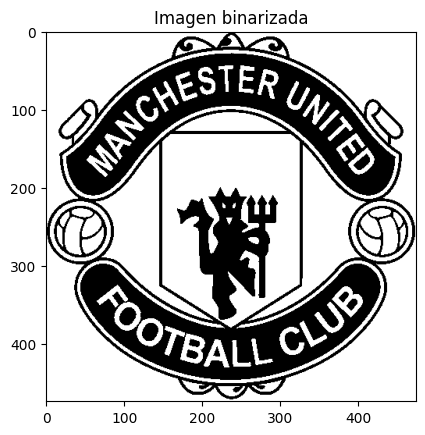

In [20]:
unitedbw = Gscale(ImUnited)
unitedbin = Binarize(unitedbw,150)
plt.title("Imagen binarizada")
plt.imshow(unitedbin, cmap = 'gray')

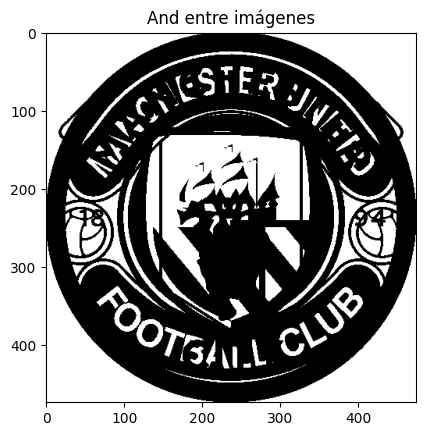

In [21]:
testand = ImAND(citybin,unitedbin)
plt.title("And entre imágenes")
plt.imshow(testand,cmap = 'gray')

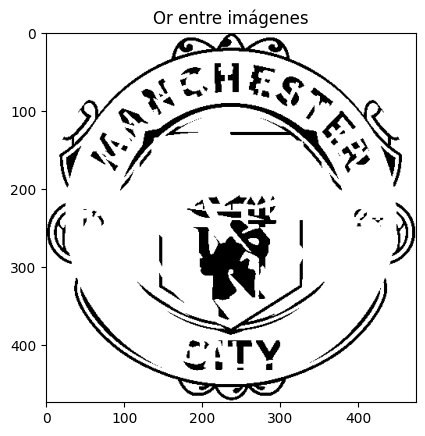

In [22]:
testor = ImOR(unitedbin,citybin)
plt.title("Or entre imágenes")
plt.imshow(testor,cmap = 'gray')

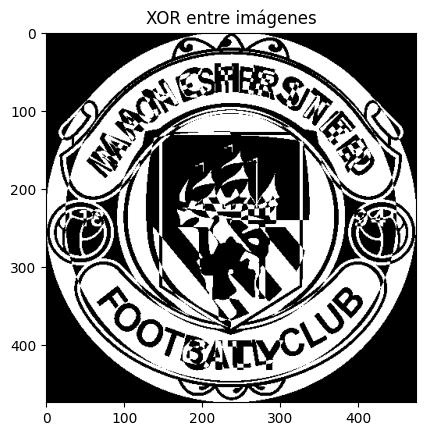

In [23]:
testxor = ImXOR(unitedbin,citybin)
plt.title("XOR entre imágenes")
plt.imshow(testxor, cmap = 'gray')

## Problema 3

Desarrolle una función que dada una imagen en escala de grises, muestre un gráfico tridimensional, donde los ejes X y Y son las dimensiones espaciales de la imagen, y el eje z es la intensidad de gris en cada pixel

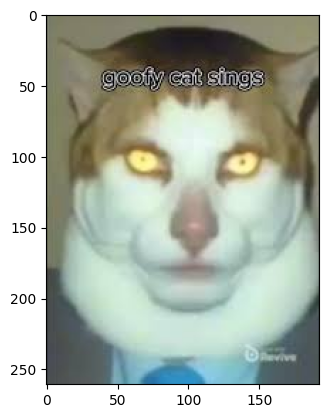

In [37]:
## Se carga la imagen.

Implot = cv2.imread('/content/monday.jpg')
Implot = cv2.cvtColor(Implot, cv2.COLOR_BGR2RGB)
plt.imshow(Implot)

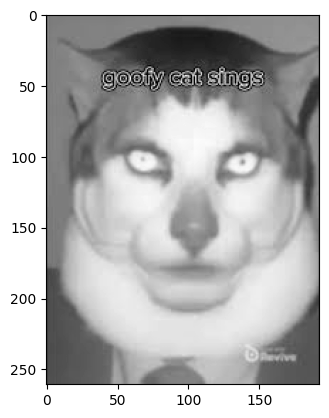

In [38]:
### Se convierte la imagen a escala de grises
Im3GS = Gscale(Implot)
plt.imshow(Im3GS, cmap = 'gray')

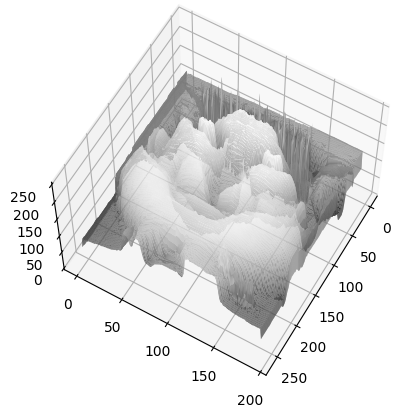

In [87]:
xx,yy = np.mgrid[0:Im3GS.shape[0],0:Im3GS.shape[1]]

ax = plt.axes(projection = '3d')
surf = ax.plot_surface(xx,yy,Im3GS, cmap = plt.cm.gray, rstride =1, cstride =1, linewidth =0)
ax.view_init(60,30)
plt.show()

## Problema 4
Desarrolle funciones para las siguientes transformaciones:

* negativa
* lineal
* logarítmica
* exponencial

In [65]:
def TNegativa(Im1):
  h,w = Im1.shape[0], Im1.shape[1]
  Im1 = Im1/255
  ImNeg = np.zeros((h,w,3))
  for x in range(h):
    for y in range(w):
      NegR = 1 - Im1[x,y,0]
      NegG = 1 - Im1[x,y,1]
      NegB = 1 - Im1[x,y,2]
      ImNeg[x,y] = [NegR,NegG,NegB]
  ImNeg = ImNeg.astype('float32')
  return ImNeg



In [72]:
def TLineal(Im1,m,b):
  h,w = Im1.shape[0], Im1.shape[1]
  Im1 = Im1/255
  ImLin = np.zeros((h,w,3))
  for  x in range(h):
    for y in range(w):
      LinR = Im1[x,y,0]*m + b
      if LinR > 1:
        LinR = 1
      if LinR < 0:
        LinR = 0
      LinG = Im1[x,y,1]*m + b
      if LinG > 1:
        LinG = 1
      if LinG < 0:
        LinG = 0
      LinB = Im1[x,y,2]*m + b
      if LinB > 1:
        LinB = 1
      if LinB < 0:
        LinB = 0
      ImLin[x,y] = [LinR,LinG,LinB]
  ImLin = ImLin.astype('float32')
  return ImLin


In [112]:
def Tlog(Im1,a):
  h,w = Im1.shape[0], Im1.shape[1]
  Im1 = Im1/255
  ImLog = np.zeros((h,w,3))
  for x in range(h):
    for y in range(w):
      Rlog = a*np.log(1 + Im1[x,y,0])
      if Rlog > 1:
        Rlog = 1
      Glog = a*np.log(1 + Im1[x,y,1])
      if Glog > 1:
        Glog = 1
      Blog = a*np.log(1 + Im1[x,y,2])
      if Blog > 1:
        Blog = 1
      ImLog[x,y] = [Rlog,Glog,Blog]
  ImLog = ImLog.astype('float32')
  return ImLog



In [119]:
def Texp(Im1,a,n):
  h,w = Im1.shape[0], Im1.shape[1]
  Im1 = Im1/255
  Imexp = np.zeros((h,w,3))
  for x in range(h):
    for y in range(w):
      Rexp = a*Im1[x,y,0]**n
      if Rexp > 1 :
        Rexp = 1
      Gexp = a*Im1[x,y,1]**n
      if Gexp > 1 :
        Gexp = 1
      Bexp = a*Im1[x,y,2]**n
      if Bexp > 1 :
        Bexp = 1
      Imexp[x,y] = [Rexp,Gexp,Bexp]
  Imexp = Imexp.astype('float32')
  return Imexp

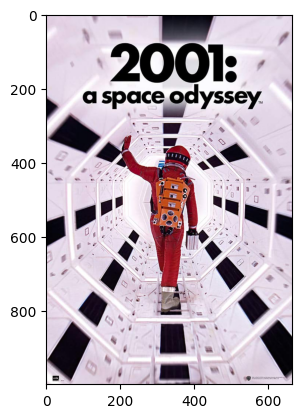

In [69]:
Im2001 = cv2.imread('2001.jpg')
Im2001 = cv2.cvtColor(Im2001,cv2.COLOR_BGR2RGB)
plt.imshow(Im2001)

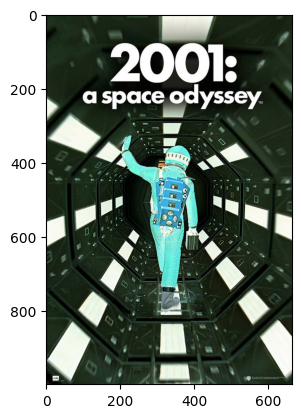

In [131]:
# Transformación negativa
INeg = TNegativa(Im2001)
plt.imshow(INeg)

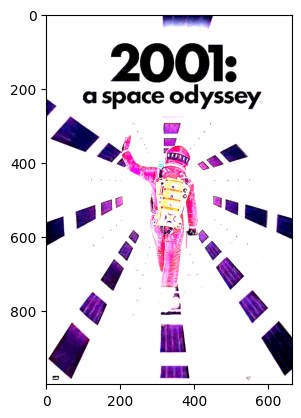

In [88]:
## Tranformación lineal
Im = TLineal(Im2001,8,-0.2)
plt.imshow(Im)

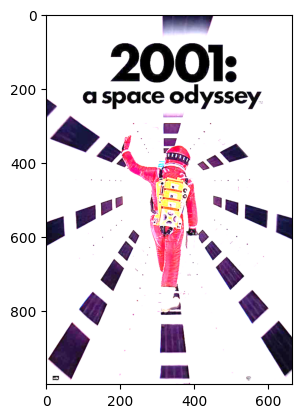

In [115]:
## Transformación logarítmica
Ilog = Tlog(Im2001,4)
plt.imshow(Ilog)

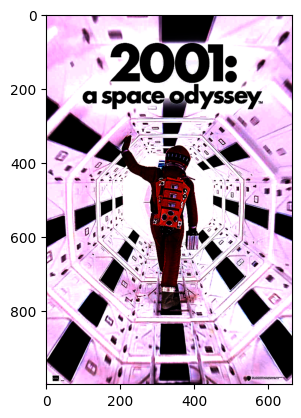

In [124]:
### Transformación exponencial
Iexp = Texp(Im2001,2,5)
plt.imshow(Iexp)

## Problema 5

Elabore una función que acepte un kernel genérico y lo opere a una imagen a color.

In [127]:
### Declarando kernels
Sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
Sobely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
Sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
Gauss3 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
Gauss5 = np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])/256
Laplace = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

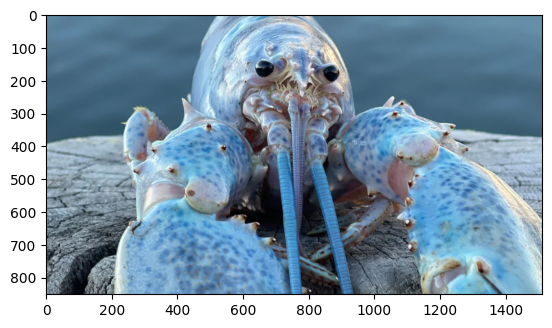

In [129]:
### Cargando imagen
Im5 = cv2.imread('/content/blue.jpg')
Im5 = cv2.cvtColor(Im5,cv2.COLOR_BGR2RGB)
plt.imshow(Im5)

In [148]:
Im5.shape

(851, 1512, 3)

In [160]:
#convolucion

def Conv2d(Im1,filtro):
  Im1 = Im1/255
  hIm,wIm,channels = Im1.shape
  hFil,wFil = filtro.shape[0],filtro.shape[1]
  hOut = hIm - hFil + 1
  wOut = wIm - wFil + 1
  ImOut = np.zeros((hIm,wIm,3))
  for color in range(channels):
    for y in range(wIm):
      if y > wOut -1:
        break
      else:
        for x in range(hIm):
            if x > hOut -1:
              break
            else:
              ImOut[x,y,color] = (Im1[x:x+hFil,y:y+wFil,color]*filtro).sum()
  ImOut = ImOut.astype('float32')
  return ImOut

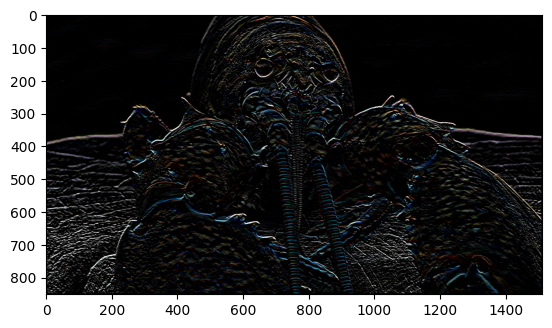

In [167]:
Imconv = Conv2d(Im5,Sobely)
plt.imshow(Imconv)

(851, 1512, 3)

## Problema 6

Investigue qué es el kernel laplaciano y cómo se diferencia del algoritmo de canny

El kernel laplaciano es un kernel isotrópico que es utilizado para obtener la segunda derivada de la imagen a la que se le aplica. Con esto se pueden detectar cambios bruscos en una imagen, los cuales se traducen en bordes. Este kernel es aplicado generalmente a imágenes que han sido suavizadas previamente con filtros gaussianos. La gran ventaja que tiene es que, al ser un filtro isotrópico, detectará bordes en todas las direcciones. Tiene una desventaja en que es muy sensible a ruido en las imágenes.

El algoritmo de canny utiliza derivadas de primer orden, y tiene etapas extra como el non maximum supression, el threshold, y además, al no ser isotrópico, utiliza dos kernels y la fase para el tratado de la imagen. Esto hace que se requiera mayor poder computacional para aplicar el método.